# JTL

In [240]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import JTL, L, Pulses
from FunctionCompiler import *

In [241]:
pulse1 = Pulses.Pulses(loc=[1], A = 1, t0 = 50)
L1 = L.L(loc=[1,2], val=3)

jtl1 = JTL.JTL(loc=[2,3], N=20)

t = np.arange(0, 200, 0.01)
fc = FunctionCompiler([pulse1, L1, jtl1], t)

sol = fc.solve()

Generated objects are: Pulses1 L1 JTL1_JJ1 JTL1_Ib1 JTL1_L1 JTL1_JJ2 JTL1_Ib2 JTL1_L2 JTL1_JJ3 JTL1_Ib3 JTL1_L3 JTL1_JJ4 JTL1_Ib4 JTL1_L4 JTL1_JJ5 JTL1_Ib5 JTL1_L5 JTL1_JJ6 JTL1_Ib6 JTL1_L6 JTL1_JJ7 JTL1_Ib7 JTL1_L7 JTL1_JJ8 JTL1_Ib8 JTL1_L8 JTL1_JJ9 JTL1_Ib9 JTL1_L9 JTL1_JJ10 JTL1_Ib10 JTL1_L10 JTL1_JJ11 JTL1_Ib11 JTL1_L11 JTL1_JJ12 JTL1_Ib12 JTL1_L12 JTL1_JJ13 JTL1_Ib13 JTL1_L13 JTL1_JJ14 JTL1_Ib14 JTL1_L14 JTL1_JJ15 JTL1_Ib15 JTL1_L15 JTL1_JJ16 JTL1_Ib16 JTL1_L16 JTL1_JJ17 JTL1_Ib17 JTL1_L17 JTL1_JJ18 JTL1_Ib18 JTL1_L18 JTL1_JJ19 JTL1_Ib19 JTL1_L19 JTL1_JJ20 JTL1_Ib20


In [242]:
jj_first = fc.object_dict['JTL1_JJ1']
jj_finish = fc.object_dict['JTL1_JJ20']

signal_in = pulse1.get_data("I",t,sol);
V_jj_first = jj_first.get_data("V",t,sol);
V_jj_finish = jj_finish.get_data("V",t,sol);

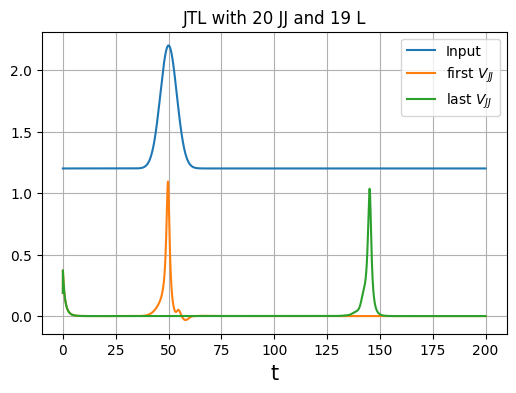

In [243]:
fig, ax = plt.subplots(dpi=100)

ax.plot(t,signal_in+1.2)
ax.plot(t,V_jj_first)
ax.plot(t,V_jj_finish)
plt.xlabel('t',fontsize=15)
plt.title("JTL with 20 JJ and 19 L")
ax.grid('on')
ax.legend(['Input', 'first $V_{JJ}$', 'last $V_{JJ}$'],loc='upper right')

# AND (asynchronous version)

In [244]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import Async_AND, JJ, Pulses, L, JTL
from FunctionCompiler import *

A_1 = Pulses.Pulses(loc=[1], t0 = 50, A = 1)
A_2 = Pulses.Pulses(loc=[1], t0 = 150, A = 1)
B = Pulses.Pulses(loc=[2], t0 = 156, A = 1)

C_1 = Pulses.Pulses(loc=[1], t0 = 250, A = 1)
C_2 = Pulses.Pulses(loc=[2], t0 = 280, A = 1)
#ib = Ib.Ib(loc=[1],  val = 3)
AND = Async_AND.Async_AND(loc=[1,2,3])

t = np.arange(0, 450, 0.5)
fc = FunctionCompiler([A_1, A_2, B,C_1, C_2, AND],t)

sol = fc.solve()

Generated objects are: Pulses1 Pulses2 Pulses3 Pulses4 Pulses5 Async_AND1_Ib1 Async_AND1_J1 Async_AND1_J2 Async_AND1_J3 Async_AND1_JD1 Async_AND1_JD2 Async_AND1_L1 Async_AND1_L2 Async_AND1_RD1 Async_AND1_RD2


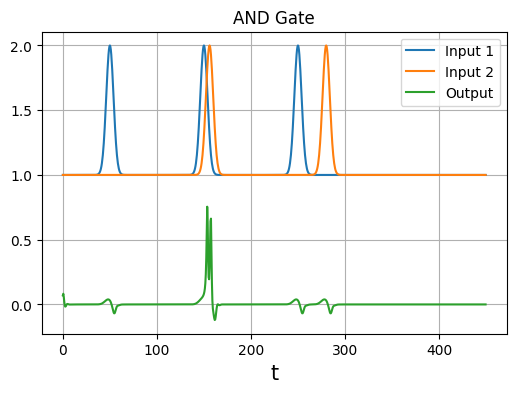

In [245]:
# Напряжение на выходном JJ

J_3 = fc.object_dict['Async_AND1_J3']
V_J_3 = J_3.get_data("V", t, sol);
signal_A_1 = A_1.get_data("I",t,sol);
signal_A_2 = A_2.get_data("I",t,sol);
signal_C_1 = C_1.get_data("I",t,sol);
signal_C_2 = C_2.get_data("I",t,sol);
signal_B = B.get_data("I",t,sol);


fig, ax = plt.subplots(dpi=100)
ax.plot(t,signal_A_1+signal_A_2+1+signal_C_1)
ax.plot(t,signal_B+1+signal_C_2)
plt.title('AND Gate')
plt.xlabel('t',fontsize=15)
#plt.ylabel('V')
ax.plot(t,V_J_3)
ax.grid('on')
ax.legend(['Input 1', 'Input 2', 'Output'],loc='upper right')
#fig.savefig('pictures/Async_AND/Async/output.png')

# OR

# XOR

# Inverter

# D Flip Flop

# Splitter

In [219]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import Splitter, JJ, Pulses, JTL
from FunctionCompiler import *

In [220]:
A = Pulses.Pulses(loc=[1], A = 1.5, t0 = 40)

splitter = Splitter.Splitter(loc=[2,3,4])

jtl_1 = JTL.JTL(loc=[1,2], N = 2, jj_c = 1, jj_r = 1)

In [221]:
t = np.arange(0, 150, 0.01)
fc = FunctionCompiler([A, splitter, jtl_1],t)
sol = fc.solve()

Generated objects are: Pulses1 Splitter1_ibJin Splitter1_ibJout1 Splitter1_ibJout2 Splitter1_Jin Splitter1_Jout1 Splitter1_Jout2 Splitter1_Lin Splitter1_Lout1 Splitter1_Lout2 JTL1_JJ1 JTL1_Ib1 JTL1_L1 JTL1_JJ2 JTL1_Ib2


In [222]:
JJ_A = fc.object_dict['JTL1_JJ1']
V_JJ_A= JJ_A.get_data("V", t, sol);

J_A = fc.object_dict['Splitter1_Jout1']
V_J_A = J_A.get_data("V", t, sol);

J_B = fc.object_dict['Splitter1_Jout2']
V_J_B = J_B.get_data("V", t, sol);

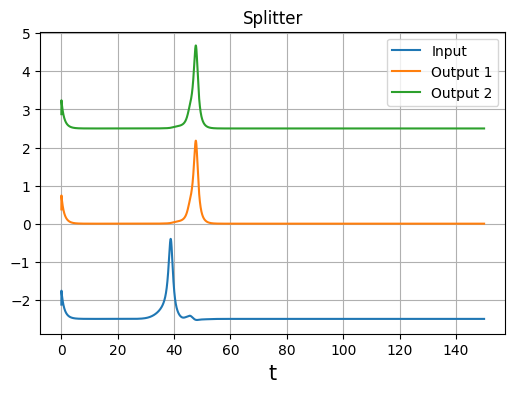

In [230]:
fig, ax = plt.subplots(dpi=100)
plt.title('Splitter')
plt.xlabel('t',fontsize=15)
ax.grid('on')
ax.plot(t,V_JJ_A-2.5)
ax.plot(t,V_J_A)
ax.plot(t,V_J_B+2.5)
ax.legend(['Input', 'Output 1', 'Output 2'],loc='upper right')

# Pulse Merger

# DC/SFQ

In [204]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import DC_SFQ, L, JJ, Pulses, JTL, R,Sine_current
from FunctionCompiler import *

In [205]:
A = Sine_current.Sine_current(loc=[1], A = 3, t0 = 100,w=0.03,length=837.75)
R1 = R.R(loc=[1,2],r=1)
#jtl = JTL.JTL(loc=[3,0], N=3)
dc_sfq = DC_SFQ.DC_SFQ(loc=[2,3])
J1 = JJ.JJ(loc=[3,0], A=1,c=1,r=1)
#jtl_out = JTL.JTL(loc=[3,4], N=2,jj_c = 1, jj_r = 1)
t = np.arange(0, 1000, 0.01)
fc = FunctionCompiler([A, R1, J1,dc_sfq],t)

sol = fc.solve()
fc.object_dict

#fc._build_reverse_index()

Generated objects are: Sine_current1 R1 JJ1 DC_SFQ1_Ib1 DC_SFQ1_J1 DC_SFQ1_J2 DC_SFQ1_J3 DC_SFQ1_J4 DC_SFQ1_L2 DC_SFQ1_L8 DC_SFQ1_L4 DC_SFQ1_Lp3 DC_SFQ1_L5 DC_SFQ1_Lp2 DC_SFQ1_L10 DC_SFQ1_L6 DC_SFQ1_Lp11 DC_SFQ1_L13 DC_SFQ1_Lp4 DC_SFQ1_L15


{'Sine_current1': <Objects.Sine_current.Sine_current at 0x219409b8610>,
 'R1': <Objects.R.R at 0x219409b8700>,
 'JJ1': <Objects.JJ.JJ at 0x219409b8640>,
 'DC_SFQ1_Ib1': <Objects.Ib.Ib at 0x219409c7cd0>,
 'DC_SFQ1_J1': <Objects.JJ.JJ at 0x219409c7e20>,
 'DC_SFQ1_J2': <Objects.JJ.JJ at 0x219409c7df0>,
 'DC_SFQ1_J3': <Objects.JJ.JJ at 0x219409b8730>,
 'DC_SFQ1_J4': <Objects.JJ.JJ at 0x219409b8820>,
 'DC_SFQ1_L2': <Objects.L.L at 0x219409b8850>,
 'DC_SFQ1_L8': <Objects.L.L at 0x219370933a0>,
 'DC_SFQ1_L4': <Objects.L.L at 0x21937093370>,
 'DC_SFQ1_Lp3': <Objects.L.L at 0x219409d9d90>,
 'DC_SFQ1_L5': <Objects.L.L at 0x219409d9dc0>,
 'DC_SFQ1_Lp2': <Objects.L.L at 0x219409d9550>,
 'DC_SFQ1_L10': <Objects.L.L at 0x219409d9df0>,
 'DC_SFQ1_L6': <Objects.L.L at 0x219409d9eb0>,
 'DC_SFQ1_Lp11': <Objects.L.L at 0x219409d9f40>,
 'DC_SFQ1_L13': <Objects.L.L at 0x219409d9c70>,
 'DC_SFQ1_Lp4': <Objects.L.L at 0x219409d9bb0>,
 'DC_SFQ1_L15': <Objects.L.L at 0x219409d9b80>}

In [206]:
V_in = R1.get_data("V",t,sol);
V_L2 = fc.object_dict['DC_SFQ1_L2'].get_data("V",t,sol);
V_L5 = fc.object_dict['DC_SFQ1_L5'].get_data("V",t,sol);
V_L8 = fc.object_dict['DC_SFQ1_L8'].get_data("V",t,sol);
V_out = J1.get_data("V",t,sol);

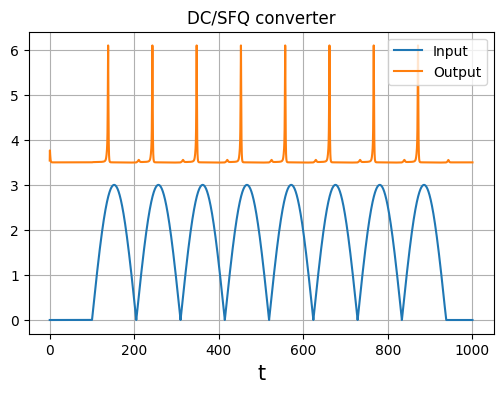

In [207]:
fig, ax = plt.subplots(dpi=100)

ax.plot()
plt.title('DC/SFQ converter')
plt.xlabel('t',fontsize=15)
#plt.ylabel('V')
ax.plot(t,V_in)
ax.grid('on')
ax.plot(t,V_out+3.5)

ax.legend(['Input','Output'])
#fig.savefig('pictures/SUNY C element/all.png')

# SFQ/DC

In [209]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import SFQ_DC, JJ, Pulses, L, R
from FunctionCompiler import *

In [210]:
T_1 = Pulses.Pulses(loc=[1], A = 1.3, t0 = 100)
T_2 = Pulses.Pulses(loc=[1], A = 1.3, t0 = 200)

T_3 = Pulses.Pulses(loc=[1], A = 1.3, t0 = 300)
T_4 = Pulses.Pulses(loc=[1], A = 1.3, t0 = 400)


conv = SFQ_DC.SFQ_DC(loc=[1,2,3])

R1 = R.R(loc=[2,0], r=0.3)
R2 = R.R(loc=[3,0],r=2.7)

t = np.arange(0, 500, 0.01)

fc = FunctionCompiler([T_1,T_2, T_3, T_4, conv, R1, R2],t)
sol = fc.solve()

Generated objects are: Pulses1 Pulses2 Pulses3 Pulses4 R1 R2 SFQ_DC1_J0 SFQ_DC1_J1 SFQ_DC1_J2 SFQ_DC1_J3 SFQ_DC1_J4 SFQ_DC1_J5 SFQ_DC1_J6 SFQ_DC1_J7 SFQ_DC1_J8 SFQ_DC1_J9 SFQ_DC1_L0 SFQ_DC1_L1 SFQ_DC1_L2 SFQ_DC1_L3 SFQ_DC1_L4 SFQ_DC1_L5 SFQ_DC1_L6 SFQ_DC1_L7 SFQ_DC1_L8 SFQ_DC1_L9 SFQ_DC1_L10 SFQ_DC1_L11 SFQ_DC1_L12 SFQ_DC1_L13 SFQ_DC1_L14 SFQ_DC1_L15 SFQ_DC1_L16 SFQ_DC1_L17 SFQ_DC1_L18 SFQ_DC1_L19 SFQ_DC1_L20 SFQ_DC1_L21 SFQ_DC1_L22 SFQ_DC1_L23 SFQ_DC1_L24 SFQ_DC1_L25 SFQ_DC1_Ib1 SFQ_DC1_Ib2 SFQ_DC1_Ib3 SFQ_DC1_Ib4


In [211]:
J0 = fc.object_dict['SFQ_DC1_J0']
L1 = fc.object_dict['SFQ_DC1_L1']
L23 = fc.object_dict['SFQ_DC1_L23']
L25 = fc.object_dict['SFQ_DC1_L25']

J7 = fc.object_dict['SFQ_DC1_J7']
J8 = fc.object_dict['SFQ_DC1_J8']


V_J0 = J0.get_data("V",t,sol);
V_L1 = L1.get_data("V",t,sol);
V_L23 = L23.get_data("V",t,sol);
V_L25 = L25.get_data("V",t,sol);

V_J7 = J7.get_data("V",t,sol);
V_J8 = J8.get_data("V",t,sol);

V_R1 = R1.get_data("V",t,sol);
V_R2 = R2.get_data("V",t,sol);

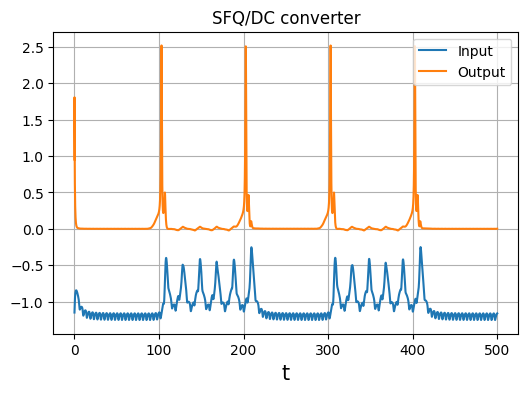

In [218]:
fig, ax = plt.subplots(dpi=100)

plt.title('SFQ/DC converter')
ax.plot(t,V_R1-1.2)
plt.xlabel('t',fontsize=15)
ax.grid('on')
ax.plot(t,V_J0)
ax.legend(['Input', 'Output'],loc='upper right')